<a href="https://colab.research.google.com/github/izzul112/ML_BMLT-Proyek_Pertama-Predictive_Analytics-Klasifikasi/blob/main/Proyek_Pertama_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laporan Proyek Machine Learning - Habib Azizul Haq**

# Domain Proyek
Klasifikasi Harga Handphone (HP).

Saat ini hp sudah sangat mudah untuk dimiliki oleh hampir semua orang, mulai dari yg harganya ratusan ribu hingga puluhan juta, tentu tergantung pada kebutuhan masing-masing orang, ada yang menganggap harga puluhan juta itu wajar dan ada yang mengangggapnya itu kemahalan.


*   Hal tersebut tentu membuat kita kadang tidak jadi membeli suatu hp, karena kita khawatir apakah nanti semua fitur tersebut Gimmik atau bukan.
*   Kita kadang juga merasa khawatir apakah semua fitur di suatu hp tersebut secara harga sesuai apa tidak, tentu kita tidak ingin terkena *genjutsu* sales-sales hp di toko yang mengatakah "Beli hp ini aja kak, PUBG rata kanan semua!", namun setelah di rumah kita baru sadar kok beli hp yang ini? Padahal tadi maunya bukan yang ini.
*   Sebagai orang yang jarang tau berita tentang teknologi, dan sedang mencari hp dengan kelas harga tertentu kita kadang bingung dan kesusahan dalam menentukan pilihan


Solusi dari masalah tersebut, kita kembangkan sebuah model Machine Learning (ML) untuk membantu kita yang kesulitan menentukan sebuah rentang kelas harga dari hp, apakah hp dengan spesifikasi sekian-sekian yang berada di kelas harga menengah, apakah sesuai dengan kelas harganya, atau kita di tipu oleh sales-sales hp, karena mereka ingin prodak tersebut segera habis.

*   [Tingkat Harga Smartphone](https://seremonia.kontan.co.id/news/ini-tingkatan-smartphone-berdasarkan-harga-spesifikasi)
*   [Spek HP berdasar harga](https://www.droidlime.com/fitur/ini-bedanya-hp-entry-level-mainstream-high-end-dan-flagship/)
*   [Gimmick](https://youtu.be/cvp-YcCgHpU)
*   [Genjutsu Marketing](https://youtu.be/pjKR2xfV83Y)






# Business Understanding

**Problem Statements**
Menjelaskan pernyataan masalah latar belakang:

*   Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap kelas harga suatu hp?
*   Berapa kelas harga pasar hp dengan karakteristik atau fitur tertentu?

**Goals**
Menjelaskan tujuan dari pernyataan masalah:

*   Mengetahui fitur yang paling berkorelasi dengan kelas harga hp.
*   Membuat model machine learning yang dapat memprediksi kelas harga hp seakurat mungkin berdasarkan fitur-fitur yang ada.

**Solution statements**

*   Untuk menghasilkan model yang optimal namun tetap sederhana kita akan menggunakan 3 algoritma yaitu KNeighborsClassifier, RandomForestClassifier, GradientBoostingClassifier.
*   Dari 3 algoritma di atas kita akan menggunakan metrik Mean Absolute Error yang memang cocok untuk kasus klasifikasi, untuk melihat pada ketiga algoritma diatas mana yang paling powerfull.


# **Data Understanding**
Paragraf awal bagian ini menjelaskan informasi mengenai data yang Anda gunakan dalam proyek. Sertakan juga sumber atau tautan untuk mengunduh dataset. Contoh: UCI Machine Learning Repository.
Kita akan menggunkan dataset yang berisi 21 variabel yang biasanya sering ditanyakan ketika membeli hp atau mungkin menjadi suatu standar yang digunakan masyarakat dalam menggolongkan kelas harga dari suatu hp.

Sumber dataset yang akan kita gunakan berasal dari [Kaggle](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?datasetId=11167&select=train.csv). Yang di publis oleh ABHISHEK SHARMA.

Variabel-variabel pada Mobile Price Classification adalah sebagai berikut:

*   battery_power : total kapasitas baterai dalam mAh
*   blue : apakah memiliki bluethoot atau tidak
*   clock_speed : kecepatan dari prosesor
*   dual_sim : apakah mendukung dua sim card
*   fc : kamera depan dalam mega pixel
*   four_g : sudah 4G atau belum
*   int_memory : memory internal
*   m_dep : kedalaman hp dalam satuan cm
*   mobile_wt : berat dari hp
*   n_cores : jumlah dari core prosessor
*   pc : kamera utama dalam mega pixel
*   px_height : tinggi resolusi dalam satuan pixel
*   px_width : lebar resolusi dalam satuan pixel
*   ram : jumlah ram yang dipakai dalam satuan Megabytes
*   sc_h : tinggi layar hp dalam satuan cm
*   sc_w : lebar layar hp dalam satuan cm
*   talk_time : lama penggunaan setelah satu kali pengisian daya
*   three_g : sudah 3G atau belum
*   touch_screen : sudah layar sentuh apa belum
*   wifi : punya wifi atau tidak
*   price_range : rentang harga

Dari 21 variabel diatas variabel price_range adalah sasaran kita, kita akan membuat model berdasar rentang harga yang ada di dalam variabel price_range, dengan nilai:
* 0 = low cost (Entry-level)
* 1 = medium cost (Mid-range)
* 2 = high cost (High-end)
* 3 = very high cost (Flagship / hp para Sultan)

Kita akan melakukan sedikit analisis untuk mengethui beberapa hal tentang variabel diatas diantaranya :
1.  Kita akan melihat ada berapa jumlah baris dari data dalam tampilan tabel.
2.  Kita akan melihat tipe data dari 21 kolom di dataset.
3.  Kita akan mengecek deskripsi statistik data.
4.  Kita akan melihat apakah ada data yang kosong / tidak ada isinya.
5.  Kita akan melihat apakah data kita memiliki outliers.
6.  Kita akan melihat variabel apa saja yang memiliki hubungan yang kuat atas klasifikasi harga suatu hp.






In [1]:
# kita import dulu semua bahan yang kita butuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# **Pembahasan**
**1. Kita akan melihat ada berapa jumlah baris dari data dalam tampilan tabel.**

Kita akan menggunakan menggunakan kode `data_train`, `data_train` adalah nama variabel yang kita ganakan saat meload dataset kita.

In [2]:
# load the dataset
data_train = pd.read_csv('train.csv') # ini data latihnya
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Dari kode `data_train` kita mendapat informasi:

*   Ada 2000 baris dalam dataset
*   Terdapat 21 kolom


**2. Kita akan melihat tipe data dari 21 kolom di dataset.**

Kita akan menggunakan `data_train.info()`, `.info` akan menampilkan informasi tipe data 21 kolom dataset yang kita gunakan.

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Dari output terlihat bahwa:

*   Terdapat 2 kolom numerik dengan tipe data float64 yaitu : clock_speed dan m_dept.
*   Terdapat 19 kolom numerik dengan tipe data int64 yaitu : battery_power, blue, dual_sim, fc, four_g, int_memory, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_schreen, wifi dan price_range.


**3. Kita akan mengecek deskripsi statistik data.**

Kita akan mengeceknya dengan fungsi `describe()`.

In [4]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

*   Count  adalah jumlah sampel pada data.
*   Mean adalah nilai rata-rata.
*   Std adalah standar deviasi.
*   Min yaitu nilai minimum setiap kolom.
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum.


**4. Kita akan melihat apakah ada data yang kosong / tidak ada isinya.**

Kita akan mengeceknya dengan fungsi `.isnull().sum()`. Fungsi `.isnull()` akan mengecek apakah ada data kosng pada setiap baris pada semua kolom di dataset kita, kemudian kita gunakan juga fungsi `.sum()` untuk menjumlahnya sehingga hasilnya akan seperti berikut.

In [5]:
# ngecek apakah ada kolom yg null / kosong tidak ada nilainya
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Dari hasil outputnya data kita tidak memiliki data yang kosong.

**5. Kita akan melihat apakah data kita memiliki outliers**

ita akan mengeceknya dengan fungsi `sns.boxplot(x=data_train['px_height'])`. Variabel `sns` adalah tempat kita menampung library **Seaborn** yang akan kita gunakan untuk memvisualisaikan dataset kita. Dalam hal ini kita menggunakan sampel `px_heght` dan `fc` dari gambar bisa kita lihat adanya outliers.

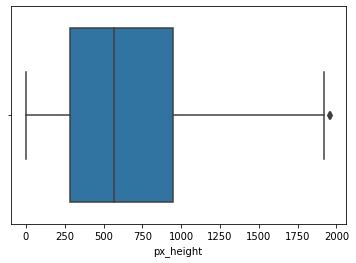

In [6]:
sns.boxplot(x=data_train['px_height'])

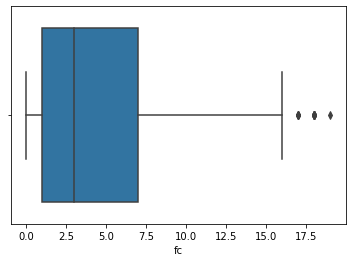

In [7]:
sns.boxplot(x=data_train['fc'])

Tenang tidak perlu panik kita akan mengatasinya dengan teknik IQR dimana data yang berada di luar Q1 dan Q3 adalah outlier, dimana kita akan menentukan nilai batas atas dan bawah, dengan persamaan berikut:
- Batas bawah = Q1 - 1.5 * IQR
- Batas atas = Q3 + 1.5 * IQR

Langsung saja kita set variabel Q1, Q2 dan IQR-nya



In [8]:
# set variabel Q1, Q2 dan IQR-nya
Q1 = data_train.quantile(0.25)
Q3 = data_train.quantile(0.75)
IQR=Q3-Q1

# Setelah itu kita hitung dan hapus sekalian data yang tidak sesuai dengan spesifikasi yang kita buat dengan kode berikut
data_train=data_train[~((data_train<(Q1-1.5*IQR))|(data_train>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data_train.shape

(1506, 21)

Dan sekarang data kita sudah berkurang dari 2000 menjadi 1506 dan jumlah kolomnya tetap 21.

**6. Kita akan melihat variabel apa saja yang memiliki hubungan yang kuat atas klasifikasi harga suatu hp.**

Pertama kita akan melihat 21 kolom yang ada dalam dataset dalam bentuk tabel supaya kita bisa lebih mengetahui tentang isi dari nilai setiap kolom dengan kode berikut `data_train.hist(bins=50, figsize=(20,15))` fungsi `.hist()` akan menampilkan data dalam bentul diagram dengan variabel `bins=50` adalah jumlah menara pada data yaitu 50 sedang `figsize=(20,15)` adalah ukuran dari diagram kita. setelah itu kita gunkan kode `plt.show()` untuk menampilkan diagramnya. 

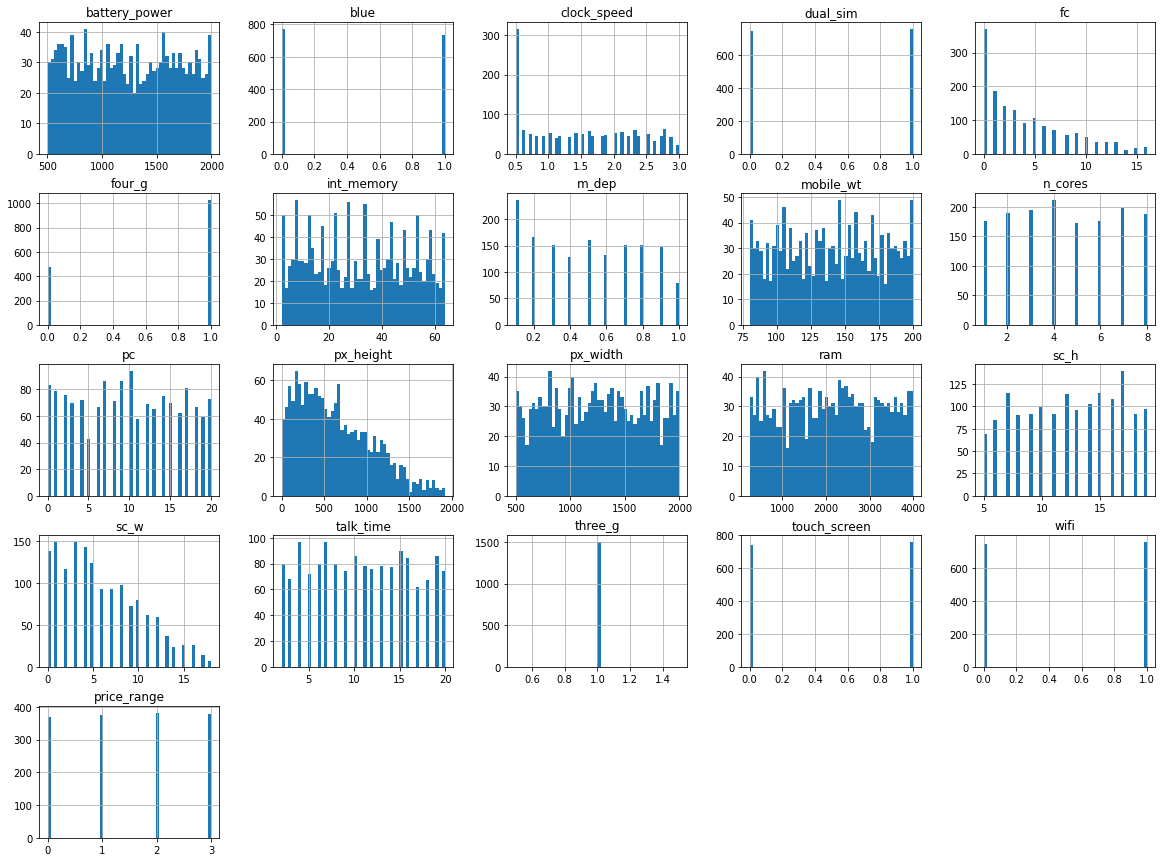

In [9]:
data_train.hist(bins=50, figsize=(20,15))
plt.show()

Dari tampilan diagram dapat kita simpulkan bahwa ada beberapa variabel yang bertipe biner atau yang isinya hanya 0 dan 1, dan ada yang isinya angka lebih dari itu. Kita lihat list dibawah untuk lebi jelas mana yang memiliki fitur biner dan bukan.

*   binary_features = blue, dual_sim, four_g, three_g, touch_screen, wifi
*   non_binary_features = battery_power, clock_speed, fc, int_memory, m_dep, mobile_wt, n_core, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, price_range


 Selanjutnya kita lanjut melihat setiap korelasi setiap fitur dengan dengan price_range, dengan koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.

 1. Kita lihat pada binary_features terlebih dahulu

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Biner ')

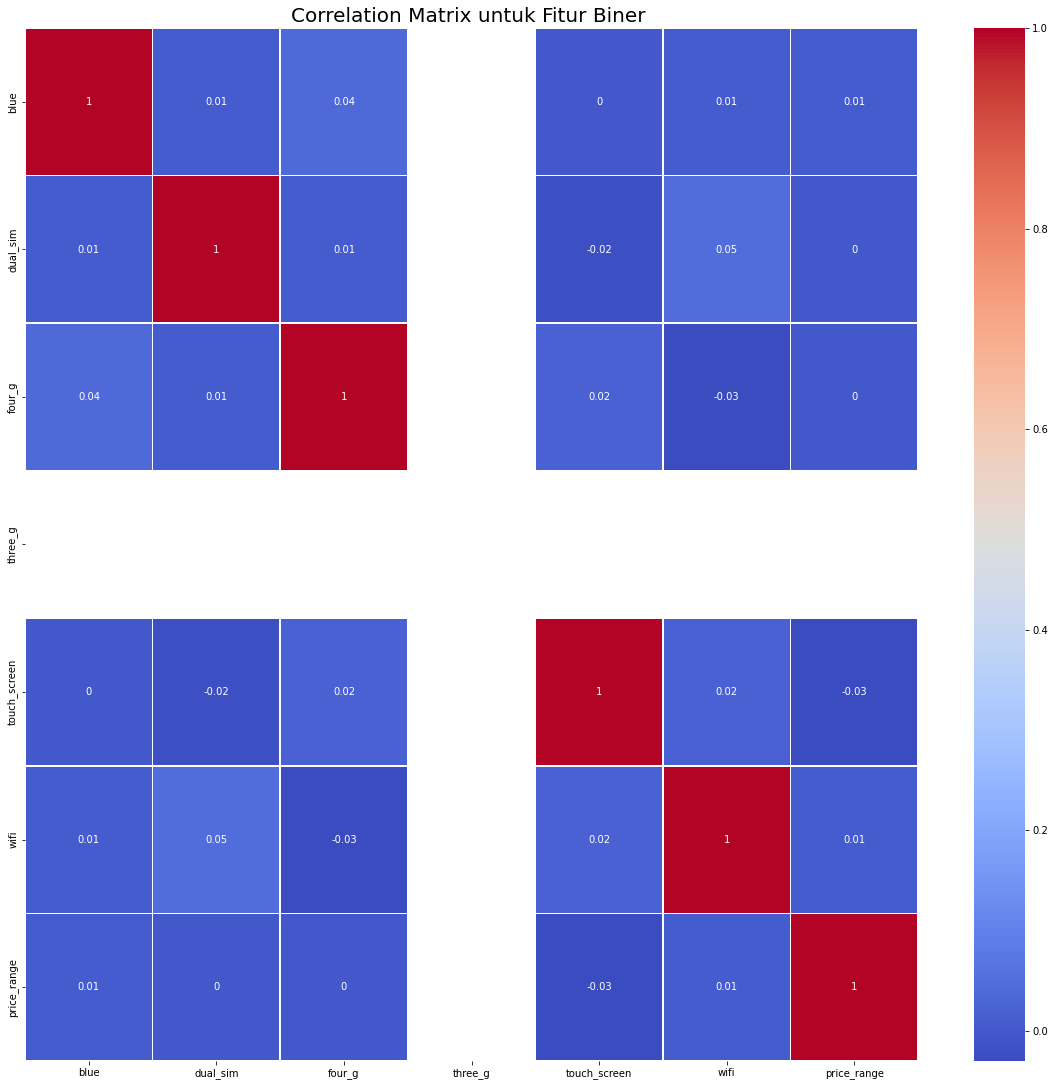

In [10]:
plt.figure(figsize=(20, 19))
correlation_matrix = data_train[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Biner ", size=20)

- Di binary_features, fitur three_g tidak memiliki gambar atau gambarnya putih bersih, karena nilai hanya 1 saja atau kebanyakan hp pada dataset sudah masuk kategori three_g semua, jadi kita akan menghapus fitur ini, fitur four_g dan dual_sim juga karena memiliki korelasi paling kecil yaitu 0.

In [11]:
pd.set_option('mode.chained_assignment', None)
data_train.drop(['three_g', 'four_g', 'dual_sim'], inplace=True, axis=1)
data_train

,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,touch_screen,wifi,price_range
1,1021,1,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1,0,2
2,563,1,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,0,2
3,615,1,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,0,0,2
4,1821,1,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,0,1
5,1859,0,0.5,3,22,0.7,164,1,7,1004,1654,1067,17,1,10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,1,0,0
1996,1965,1,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,2
1997,1911,0,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,0,3
1998,1512,0,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,1,1,0


 2. Selanjutnya kita lihat pada non_binary_features

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Non Biner ')

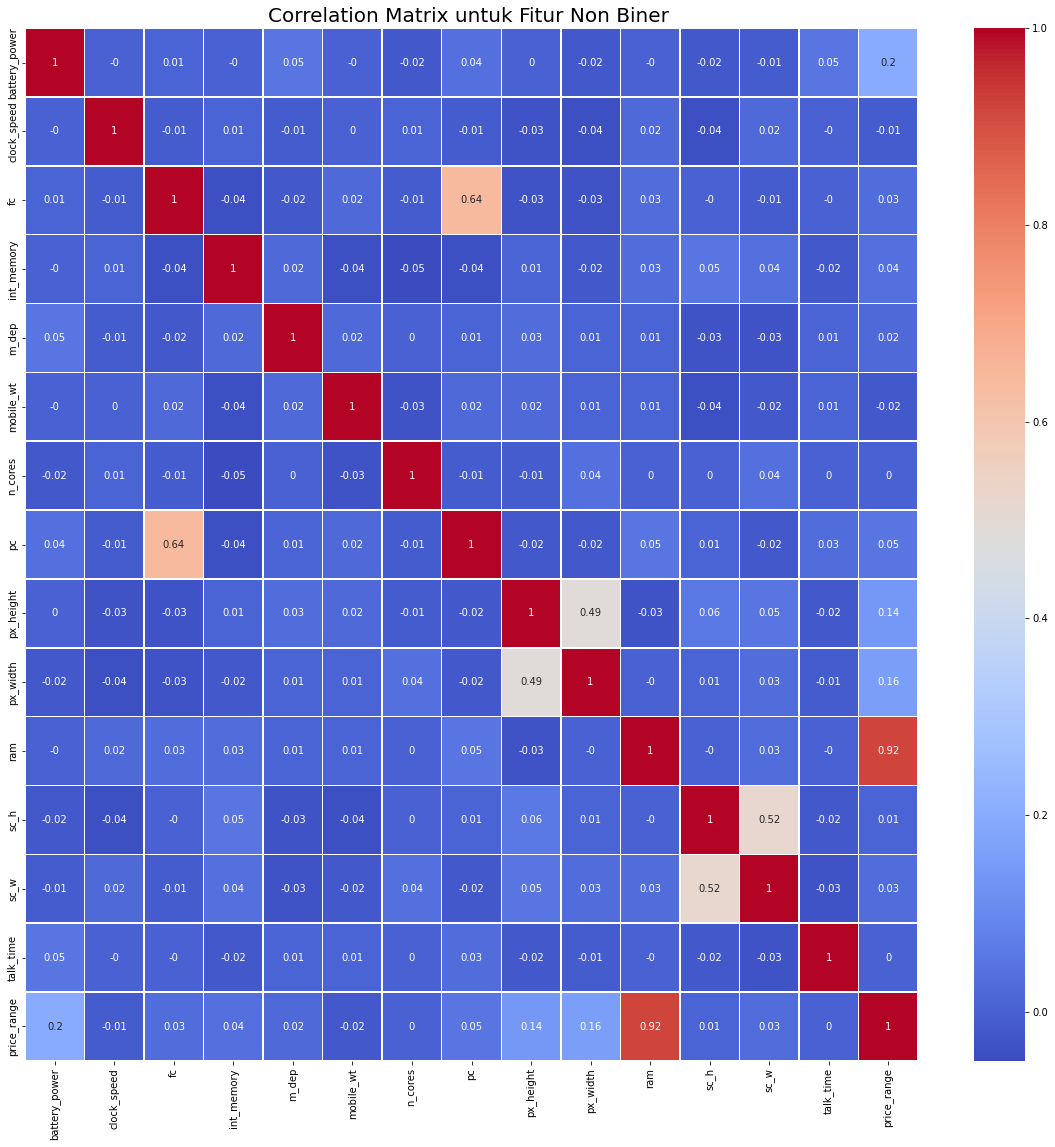

In [12]:
plt.figure(figsize=(20, 19))
correlation_matrix = data_train[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Non Biner ", size=20)

   - Di non_binary_features, fitur **ram** merupakan fitur dengan tingkat korelasi tertinggi yaitu: 0.92. Sedang n_core dan talk_time memiliki korelasi paling kecil yaitu 0, maka kita akan menghapus 2 fitur ini.

In [13]:
pd.set_option('mode.chained_assignment', None)
data_train.drop(['n_cores', 'talk_time'], inplace=True, axis=1)
data_train

,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,touch_screen,wifi,price_range
1,1021,1,0.5,0,53,0.7,136,6,905,1988,2631,17,3,1,0,2
2,563,1,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,1,0,2
3,615,1,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,0,0,2
4,1821,1,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,1,0,1
5,1859,0,0.5,3,22,0.7,164,7,1004,1654,1067,17,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,0,2,0.8,106,14,1222,1890,668,13,4,1,0,0
1996,1965,1,2.6,0,39,0.2,187,3,915,1965,2032,11,10,1,1,2
1997,1911,0,0.9,1,36,0.7,108,3,868,1632,3057,9,1,1,0,3
1998,1512,0,0.9,4,46,0.1,145,5,336,670,869,18,10,1,1,0


Dengan ini total kolom yang kita miliki ada 16, menyusut 5 dari total di awal kita memiliki 21 kolom.

**7. Kita akan melihat perbandingan jumlah sampel dari variabel price_range**

Kita akan melihatnya dalam bentuk tabel dengam kode berikut.

             jumlah sampel  persentase
price_range                           
2                      383        25.4
3                      380        25.2
1                      374        24.8
0                      369        24.5


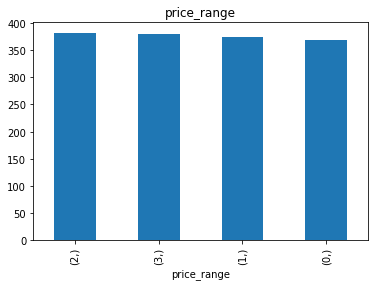

In [14]:

count = data_train[['price_range']].value_counts()
percent = 100*data_train[['price_range']].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title='price_range');

Dari hasil visualisasi diatas dapat kita simpulkan bahawa dataset kita memiliki jumlah sampel yang seimbang atau tidak berat sebelah.

# **Data Preparation**

Di proses ini kita akan melakukan 2 proses yaitu:
1. Reduksi dimensi dengan Principal Component Analysis (PCA).
2. Pembagian dataset dengan fungsi train_test_split dari library sklearn.


**Pembahasan**
1. Reduksi dimensi dengan Principal Component Analysis (PCA).

Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya.

Berikut penjelasan untuk masing-masing komponen utama (PC):
   - PC pertama mewakili arah varians maksimum dalam data. Ia paling banyak menangkap informasi dari semua fitur dalam data. 
   - PC kedua menangkap sebagian besar informasi yang tersisa setelah PC pertama. 
   - PC ketiga menangkap sebagian besar informasi yang tersisa setelah PC pertama, PC kedua, dst.

Selanjutnya kita import dulu kelas PCA nya dengan kode `from sklearn.decomposition import PCA`, setelah itu kita set variabel dari kelas PCA kita, untuk `n_components=2` kita set = 2, sedang `random_state=123)` kita set dengan = 123, `random_state` ini bebas kita isi dengan angka berapapun asal itu masih bilangan integer.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(data_train[['px_height', 'px_width']])
princ_comp = pca.transform(data_train[['px_height', 'px_width']])

Setelah itu kita print hasilnya yang `n_components=2`.

In [16]:
pca.explained_variance_ratio_.round(2)

array([0.75, 0.25])

Hasilnya adalah `array([0.75, 0.25])` artinya 75% dari kedua fitur ada di PC pertama dan 25% di PC kedua.

Selanjutnya Kita reduksi kelima fitur tersebut menjadi 2 yaitu resolution_px dan dimension_hp, resolution_px adalah dimensi pexel sedang dimension_hp adalah dimensi dari hp tersebut. Kita akan melakukan perubahan sebagai berikut:
   - `n_components=1` karena hanya ada 1 komponen saja.
   - Fit model dengan data masukan.
   - Tambahkan fitur baru ke dataset dengan nama 'resolution_px'.
   - Drop kolom 'px_height', 'px_width' untuk resolution_px
   

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pd.set_option('mode.chained_assignment', None)
pca.fit(data_train[['px_height', 'px_width']])
data_train['resolution_px'] = pca.transform(data_train.loc[:, ('px_height', 'px_width')]).flatten()
data_train.drop(['px_height', 'px_width'], axis=1, inplace=True)

# kita tampilkan hasil dari proses PCA diatas
data_train.head()

,battery_power,blue,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,ram,sc_h,sc_w,touch_screen,wifi,price_range,resolution_px
1,1021,1,0.5,0,53,0.7,136,6,2631,17,3,1,0,2,709.935982
2,563,1,0.5,2,41,0.9,145,6,2603,11,2,1,0,2,777.316144
3,615,1,2.5,0,10,0.8,131,9,2769,16,8,0,0,2,792.356645
4,1821,1,1.2,13,44,0.6,141,14,1411,8,2,1,0,1,386.772940
5,1859,0,0.5,3,22,0.7,164,7,1067,17,1,0,0,1,548.303415


Lakukan hal yang sama dengan fitur resolution_px, import dulu kelas PCA nya dengan kode `from sklearn.decomposition import PCA`, setelah itu kita set variabel dari kelas PCA kita, untuk `n_components=3` kita set = 3 karena ada, sedang `random_state=123)` kita set dengan = 123, `random_state` ini bebas kita isi dengan angka berapapun asal itu masih bilangan integer.

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(data_train[['sc_h','sc_w', 'm_dep']])
princ_comp = pca.transform(data_train[['sc_h','sc_w', 'm_dep']])

Setelah itu kita print hasilnya yang `n_components=3`.

In [19]:
pca.explained_variance_ratio_.round(3)

array([0.757, 0.241, 0.002])

Hasilnya adalah `array([0.757, 0.241, 0.002])` yang artinya 75% dari ke 3 fitur ada di PC pertama, 24% ada di PC kedua dan 0,002 atau sisanya ada di PC3.

Selanjutnya Kita reduksi kelima fitur tersebut menjadi 2 yaitu dimension_px dan dimension_hp, dimension_px adalah dimensi pexel sedang dimension_hp adalah dimensi dari hp tersebut. Kita akan melakukan perubahan sebagai berikut
   - `n_components=1` karena hanya ada 1 komponen saja.
   - Fit model dengan data masukan.
   - Tambahkan fitur baru ke dataset dengan nama dimension_hp, kemudian lakukan proses transformasi.
   - Drop kolom 'sc_h','sc_w', 'm_dep' untuk dimension_hp.

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pd.set_option('mode.chained_assignment', None)
pca.fit(data_train[['sc_h','sc_w', 'm_dep']])
data_train['dimension_hp'] = pca.transform(data_train.loc[:, ('sc_h','sc_w', 'm_dep')]).flatten()
data_train.drop(['sc_h','sc_w', 'm_dep'], axis=1, inplace=True)

# kita tampilkan hasil dari proses PCA diatas
data_train.head()

,battery_power,blue,clock_speed,fc,int_memory,mobile_wt,pc,ram,touch_screen,wifi,price_range,resolution_px,dimension_hp
1,1021,1,0.5,0,53,136,6,2631,1,0,2,709.935982,1.032958
2,563,1,0.5,2,41,145,6,2603,1,0,2,777.316144,-3.750034
3,615,1,2.5,0,10,131,9,2769,0,0,2,792.356645,4.052512
4,1821,1,1.2,13,44,141,14,1411,1,0,1,386.772940,-5.771506
5,1859,0,0.5,3,22,164,7,1067,0,0,1,548.303415,-0.444524


2. Pembagian dataset dengan fungsi train_test_split dari library sklearn.
   
   Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Kita perlu mempertahankan sebagian data yang ada untuk menguji seberapa baik klasifikasi model terhadap data baru. Tujuannya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih. Proporsi pembagian bisanya 80:20 jika data kita hanya 1000-an.

   Pertama kita import dulu kelas train_test_split dengan kode `from sklearn.model_selection import train_test_split`, setelah itu kita hapus fitur price_range pada variabel `X` dengan kode `X = data_train.drop(["price_range"],axis =1)` untuk variabel `y` kita set isinya price_range dengan kode `y = data_train["price_range"]`, setelah itu kita bagi dataset kita dengan proporsi data latih 80% dan data tes 20% dengan kode `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)`.

In [21]:
from sklearn.model_selection import train_test_split
 
X = data_train.drop(["price_range"],axis =1)
y = data_train["price_range"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

Setelah itu kita print dan lihat total dari pembagiannya.

In [22]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1506
Total # of sample in train dataset: 1204
Total # of sample in test dataset: 302


Hasil pembagian data latih berjumlah 1204 dan data tes berjumlah 302.

# **Modeling**
Di tahap ini kita akan menggunakan 3 jenis algoritma yaitu:
- K-Nearest Neighbor (KNN) dengan KNeighborsClassifier
- Random Forest dengan RandomForestClassifier
- Boosting Algorithm dengan GradientBoostingClassifier


In [23]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_acr', 'test_acr', 'train_cr', 'test_cr',], 
                      columns=['KNN', 'RandomForest', 'Boosting'])


1. K-Nearest Neighbor (KNN) dengan KNeighborsClassifier

   Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.
   
   KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi.

   Kelebihan pada Algoritma KNN adalah:
   - Algoritma K-NN kuat dalam mentraining data yang noisy.
   - Algoritma K-NN sangat efektif jika datanya besar.
   - Mudah diimplementasikan.
   
   Kekurangan pada Algoritma KNN adalah:
   - Algoritma K-NN perlu menentukan nilai parameter K.
   - Sensitif pada data pencilan / titik data yang terpaut jauh dari titik data lainnya.
   - Rentan pada variabel yang non-informatif.

In [24]:
# import algoritmanya
from sklearn.neighbors import KNeighborsClassifier

# import mertik dulu
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# buat model prediksi
KNN = KNeighborsClassifier(n_neighbors=10)

# Latih Model KNN
KNN.fit(X_train, y_train)

# prediksi untuk model KNN
KNN_prediction = KNN.predict(X_test)

# Metrik
models.loc['train_acr','KNN'] = accuracy_score(KNN_prediction, y_test)

2. Random Forest dengan RandomForestClassifier

   Algoritma random forest adalah salah satu algoritma supervised learning. Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni.
   
   Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir.
   
   Kelebihan pada Algoritma Random Forest adalah:
   - Dapat mengatasi noise dan missing value.
   - Dapat mengatasi data dalam jumlah yang besar.
   
   Kekurangan pada Algoritma Random Forest adalah:
   - Interpretasi yang sulit.
   - Membutuhkan tuning model yang tepat untuk data.

In [25]:
# Impor algoritmanya
from sklearn.ensemble import RandomForestClassifier
 
# buat model prediksi
RF = RandomForestClassifier(max_depth=2,
                            random_state=0)

# Latih Model RF
RF.fit(X_train, y_train)

# prediksi untuk model RF
RF_prediction = RF.predict(X_test)

models.loc['train_acr','RandomForest'] = accuracy_score(RF_prediction, y_test)   

3. Boosting Algorithm dengan GradientBoostingClassifier

   Algoritma yang menggunakan teknik boosting bekerja dengan membangun model dari data latih. Kemudian ia membuat model kedua yang bertugas memperbaiki kesalahan dari model pertama. Model ditambahkan sampai data latih terprediksi dengan baik atau telah mencapai jumlah maksimum model untuk ditambahkan.
   
   Seperti namanya, boosting, algoritma ini bertujuan untuk meningkatkan performa atau akurasi prediksi. Caranya adalah dengan menggabungkan beberapa model sederhana dan dianggap lemah (weak learners) sehingga membentuk suatu model yang kuat (strong ensemble learner). Algoritma boosting muncul dari gagasan mengenai apakah algoritma yang sederhana seperti linear regression dan decision tree dapat dimodifikasi untuk dapat meningkatkan performa.
   
   Kelebihan pada Algoritma Boosting adalah:
   - Hasil pemodelan yang lebih akurat.
   - Model yang stabil dan lebih kuat (robust).
   
   Kekurangan pada Algoritma Boosting adalah:
   - Pengurangan kemampuan interpretasi model.
   - Tingkat kesulitan yang tinggi.

In [26]:
# Impor algoritmanya
from sklearn.ensemble import GradientBoostingClassifier

# buat model prediksi
boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
      max_depth=1, random_state=0)

# Latih Model Boosting
boosting.fit(X_train, y_train)

# prediksi untuk model Boosting
Boosting_prediction = boosting.predict(X_test)

models.loc['train_acr','Boosting'] = accuracy_score(Boosting_prediction, y_test)

# **Evaluation**
Ditahap ini kita akan mengevaluasi setiap model dengan menggunakan metrik `accuracy_score` dan `classification_report`. Dan diakhir kita akan memilih model yang paling baik dari evaluasi menggunakan kedua mertik tersebut.

1. Cara kerja metrik `accuracy_score`

   Metrik `accuracy_score` bekerja dengan rumus, Accuracy Score = (TP+TN)/ (TP+FN+TN+FP), dimana:
   - TP = True Positive 
   - TN = True Negative
   - FP = False Positive
   - FN = False Negatif
   Dalam klasifikasi multilabel, fungsi mengembalikan akurasi subset. Jika seluruh rangkaian label yang diprediksi untuk sampel secara akurat cocok dengan rangkaian label yang sebenarnya. Maka akurasi subset adalah 1,0 jika tidak, akurasinya hampir 0,0.

In [27]:
# Buat variabel acr yang isinya adalah dataframe nilai acr data train dan test pada masing-masing algoritma
acr = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': KNN, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Absolute Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    acr.loc[name, 'train'] = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
    acr.loc[name, 'test'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))

# panggil acr
acr

,train,test
KNN,0.946013,0.92053
RF,0.804817,0.781457
Boosting,0.999169,0.897351


Mari kita visualisasikan tabel diatas suapay lebih mudah dipahami.

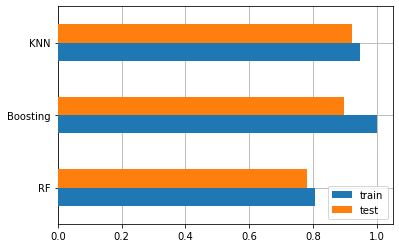

In [28]:
fig, ax = plt.subplots()
acr.sort_values(by='test', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari hasil diatas **Model KNN** bisa dibilang yang terbaik menurut metrik `accuracy_score`.

2. Cara kerja metrik `classification_report`

   Metrik `classification_report` bekerja dengan mengembalikan 4 nilai yaitu 'precision', 'recall', 'f1-score', 'support'. Dengan acuan seperti berikut:
   - Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan **Accuracy**, tetapi jika tidak seimbang, maka sebaiknya menggunakan **F1-Score**.
   - Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan **Recall**.
   - Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan **Precision**.

In [29]:
print('Hasil untuk model KNN Train')
print(classification_report(KNN.predict(X_train), y_train))
print('')
print('Hasil untuk model KNN Test')
print(classification_report(KNN.predict(X_test), y_test))

Hasil untuk model KNN Train
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       312
           1       0.92      0.95      0.93       296
           2       0.95      0.91      0.93       318
           3       0.93      0.98      0.95       278

    accuracy                           0.95      1204
   macro avg       0.95      0.95      0.95      1204
weighted avg       0.95      0.95      0.95      1204


Hasil untuk model KNN Test
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        65
           1       0.94      0.88      0.91        76
           2       0.89      0.90      0.89        78
           3       0.92      0.95      0.93        83

    accuracy                           0.92       302
   macro avg       0.92      0.92      0.92       302
weighted avg       0.92      0.92      0.92       302



In [30]:
print('Hasil untuk model Random Forest Train')
print(classification_report(RF.predict(X_train), y_train))
print('')
print('Hasil untuk model Random Forest Test')
print(classification_report(RF.predict(X_test), y_test))

Hasil untuk model Random Forest Train
              precision    recall  f1-score   support

           0       0.98      0.82      0.90       360
           1       0.63      0.76      0.69       249
           2       0.65      0.77      0.71       260
           3       0.96      0.84      0.90       335

    accuracy                           0.80      1204
   macro avg       0.81      0.80      0.80      1204
weighted avg       0.83      0.80      0.81      1204


Hasil untuk model Random Forest Test
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        74
           1       0.63      0.64      0.64        70
           2       0.59      0.77      0.67        61
           3       0.98      0.87      0.92        97

    accuracy                           0.78       302
   macro avg       0.78      0.77      0.77       302
weighted avg       0.80      0.78      0.79       302



In [31]:
print('Hasil untuk model Boosting Train')
print(classification_report(boosting.predict(X_train), y_train))
print('')
print('Hasil untuk model Boosting Test')
print(classification_report(boosting.predict(X_test), y_test))

Hasil untuk model Boosting Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       303
           1       1.00      1.00      1.00       302
           2       1.00      1.00      1.00       305
           3       1.00      1.00      1.00       294

    accuracy                           1.00      1204
   macro avg       1.00      1.00      1.00      1204
weighted avg       1.00      1.00      1.00      1204


Hasil untuk model Boosting Test
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        66
           1       0.87      0.79      0.83        78
           2       0.85      0.91      0.88        74
           3       0.95      0.98      0.96        84

    accuracy                           0.90       302
   macro avg       0.90      0.90      0.90       302
weighted avg       0.90      0.90      0.90       302



Dari hasil print bisa di simpulkan **Model KNN** masih memimpin soal hasil, kita melihatnya dari Test nya bukan Trainnya. Kita lihat nilai accuracy karena jumlah data kita yang seimbang.

In [32]:
prediksi = X_test.iloc[:20].copy()
pred_dict = {'y_true':y_test[:20]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
460,2,2,2,2
60,1,1,1,1
1786,2,2,1,1
33,3,3,3,3
679,0,0,1,1
632,1,1,1,1
48,0,0,0,1
1089,1,1,2,1
1003,0,0,0,0
206,2,2,2,2
